___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [97]:
df_CM = pd.read_csv("Churn_Modelling.csv")

In [98]:
df_CM.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [99]:
df_CM.shape

(10000, 14)

In [100]:
df_CM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
#since the rows have 10000 values, then there is no null values in the dataset
#let's check
df_CM.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [102]:
df_CM.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [103]:
df_CM_copy = df_CM

In [104]:
df_CM['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [105]:
import pandas as pd

# Perform one-hot encoding for the 'Geography' column
dummy_geography = pd.get_dummies(df_CM['Geography'])

# Convert True to 1 and False to 0
dummy_geography = dummy_geography.astype(int)

# Display the resulting DataFrame with 1s and 0s
print(dummy_geography)



      France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]


In [106]:
#I willdrop unnecessary columns 'RowNumber','CustomerId','Surname','Geography','Gender'
df_CM.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1, inplace=True)

In [107]:
df_CM.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1       101348.880       1  
1               1       112542.580       0  
2               0       113931.570       1  
3               0        93826.630       0  
4               1        79084.100       0

In [108]:
df = pd.concat([df_CM, dummy_geography], axis = 'columns')
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1       101348.880       1       1        0      0  
1               1       112542.580       0       0        0      1  
2               0       113931.570       1       1        0      0  
3               0        93826.630       0       1        0      0  
4               1        79084.100       0       0        0      1

In [109]:
df.describe().T

count       mean       std     min       25%        50%  \
CreditScore     10000.000    650.529    96.653 350.000   584.000    652.000   
Age             10000.000     38.922    10.488  18.000    32.000     37.000   
Tenure          10000.000      5.013     2.892   0.000     3.000      5.000   
Balance         10000.000  76485.889 62397.405   0.000     0.000  97198.540   
NumOfProducts   10000.000      1.530     0.582   1.000     1.000      1.000   
HasCrCard       10000.000      0.706     0.456   0.000     0.000      1.000   
IsActiveMember  10000.000      0.515     0.500   0.000     0.000      1.000   
EstimatedSalary 10000.000 100090.240 57510.493  11.580 51002.110 100193.915   
Exited          10000.000      0.204     0.403   0.000     0.000      0.000   
France          10000.000      0.501     0.500   0.000     0.000      1.000   
Germany         10000.000      0.251     0.434   0.000     0.000      0.000   
Spain           10000.000      0.248     0.432   0.000     0.000      0.000   

                       75%        max  
CreditScore        718.000    850.000  
Age                 44.000     92.000  
Tenure               7.000     10.000  
Balance         127644.240 250898.090  
NumOfProducts        2.000      4.000  
HasCrCard            1.000      1.000  
IsActiveMember       1.000      1.000  
EstimatedSalary 149388.247 199992.480  
Exited               0.000      1.000  
France               1.000      1.000  
Germany              1.000      1.000  
Spain                0.000      1.000

In [110]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

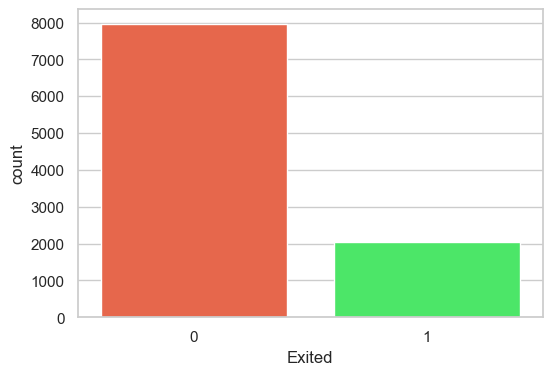

In [111]:
sns.set(style='whitegrid')

custom_palette = ["#FF5733", "#33FF57"] 

plt.figure(figsize=(6, 4)) 
sns.countplot(data=df, x='Exited', palette=custom_palette)

plt.show()


In [112]:
df.duplicated().sum()

0

In [113]:
df.corr()

CreditScore    Age  Tenure  Balance  NumOfProducts  \
CreditScore            1.000 -0.004   0.001    0.006          0.012   
Age                   -0.004  1.000  -0.010    0.028         -0.031   
Tenure                 0.001 -0.010   1.000   -0.012          0.013   
Balance                0.006  0.028  -0.012    1.000         -0.304   
NumOfProducts          0.012 -0.031   0.013   -0.304          1.000   
HasCrCard             -0.005 -0.012   0.023   -0.015          0.003   
IsActiveMember         0.026  0.085  -0.028   -0.010          0.010   
EstimatedSalary       -0.001 -0.007   0.008    0.013          0.014   
Exited                -0.027  0.285  -0.014    0.119         -0.048   
France                -0.009 -0.039  -0.003   -0.231          0.001   
Germany                0.006  0.047  -0.001    0.401         -0.010   
Spain                  0.005 -0.002   0.004   -0.135          0.009   

                 HasCrCard  IsActiveMember  EstimatedSalary  Exited  France  \
CreditScore         -0.005           0.026           -0.001  -0.027  -0.009   
Age                 -0.012           0.085           -0.007   0.285  -0.039   
Tenure               0.023          -0.028            0.008  -0.014  -0.003   
Balance             -0.015          -0.010            0.013   0.119  -0.231   
NumOfProducts        0.003           0.010            0.014  -0.048   0.001   
HasCrCard            1.000          -0.012           -0.010  -0.007   0.002   
IsActiveMember      -0.012           1.000           -0.011  -0.156   0.003   
EstimatedSalary     -0.010          -0.011            1.000   0.012  -0.003   
Exited              -0.007          -0.156            0.012   1.000  -0.105   
France               0.002           0.003           -0.003  -0.105   1.000   
Germany              0.011          -0.020            0.010   0.173  -0.580   
Spain               -0.013           0.017           -0.006  -0.053  -0.575   

                 Germany  Spain  
CreditScore        0.006  0.005  
Age                0.047 -0.002  
Tenure            -0.001  0.004  
Balance            0.401 -0.135  
NumOfProducts     -0.010  0.009  
HasCrCard          0.011 -0.013  
IsActiveMember    -0.020  0.017  
EstimatedSalary    0.010 -0.006  
Exited             0.173 -0.053  
France            -0.580 -0.575  
Germany            1.000 -0.332  
Spain             -0.332  1.000

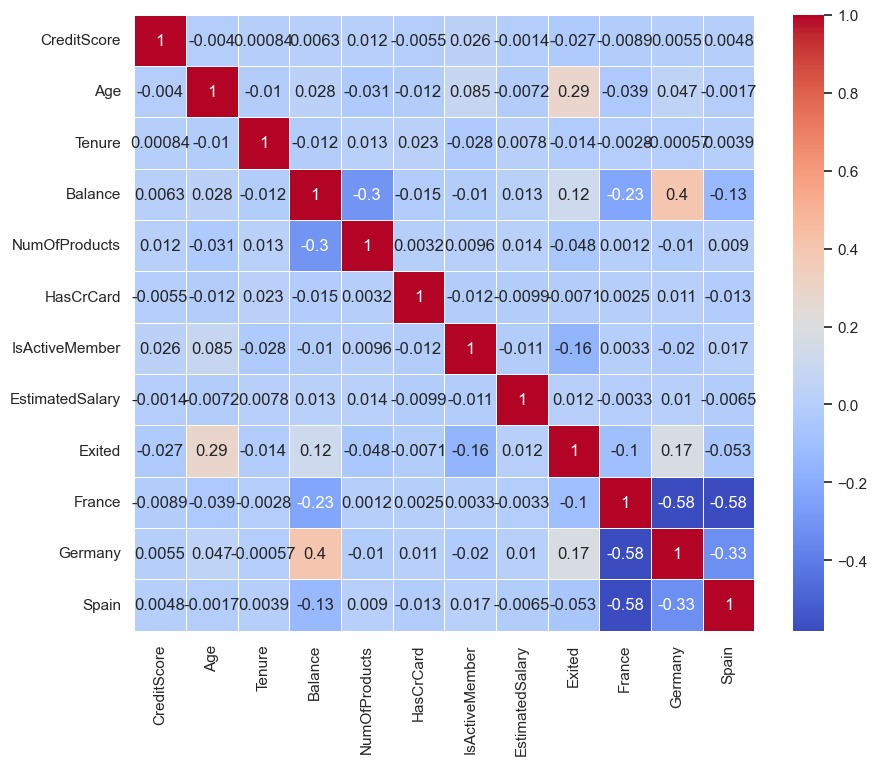

In [114]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

sns.set(style='whitegrid')
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()


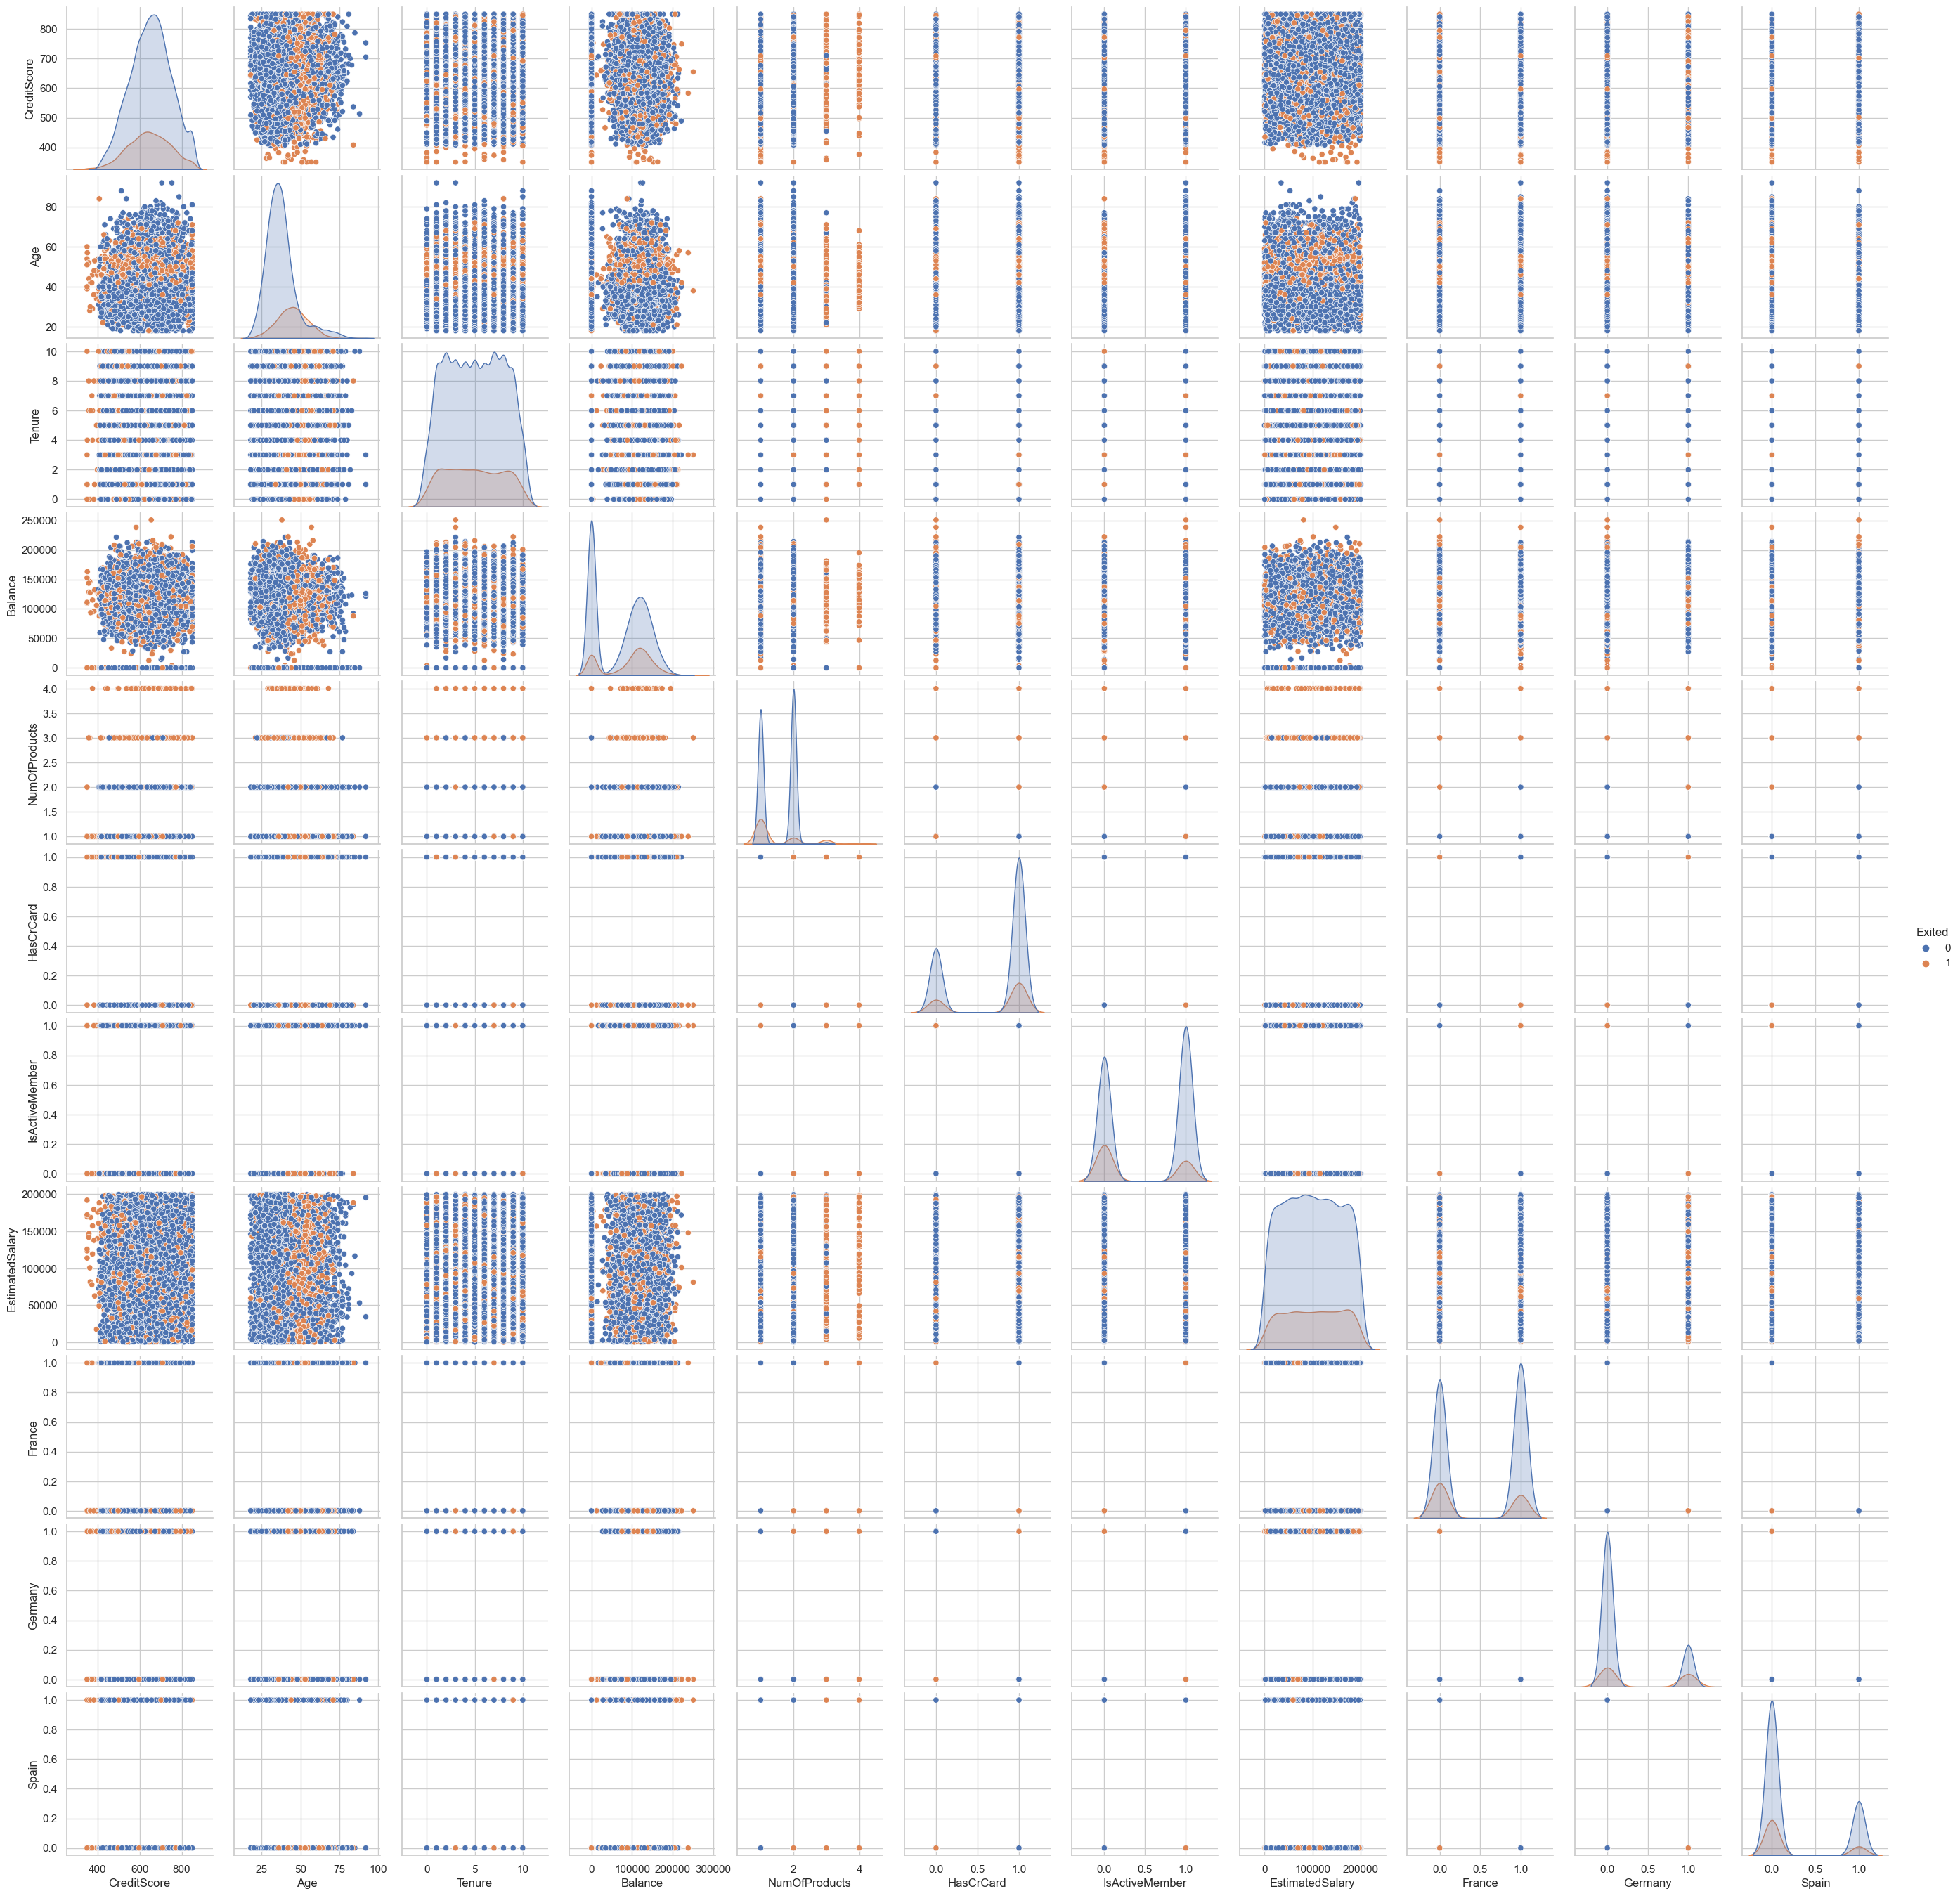

In [115]:
sns.pairplot(df, hue = 'Exited')

<Axes: >

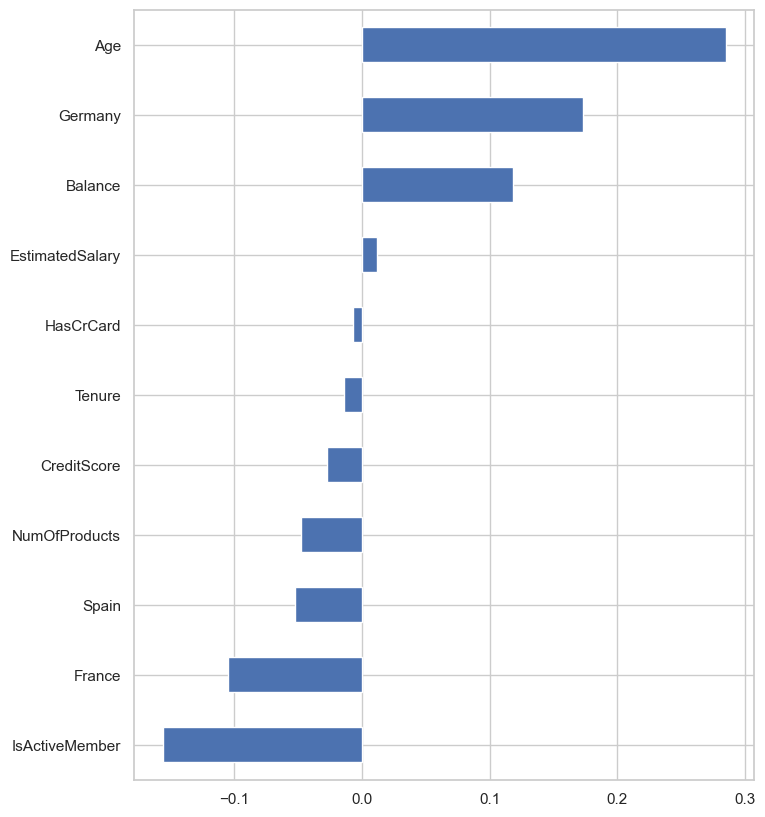

In [116]:
plt.figure(figsize=(8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")

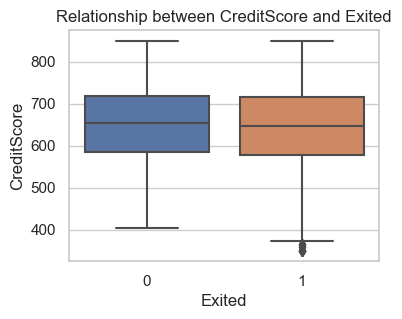

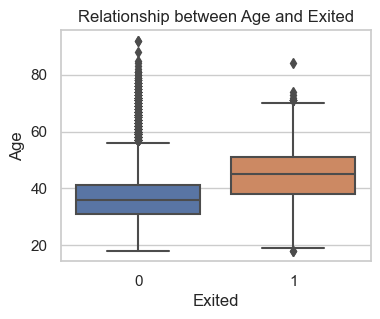

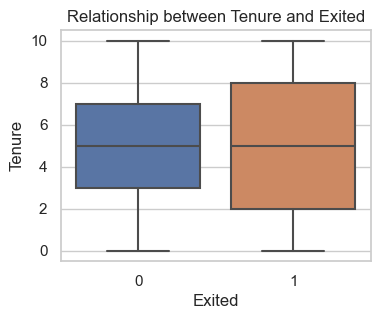

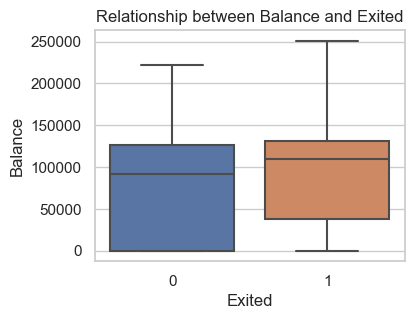

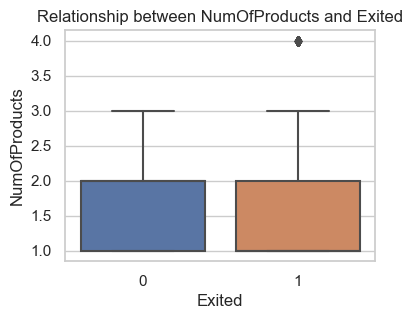

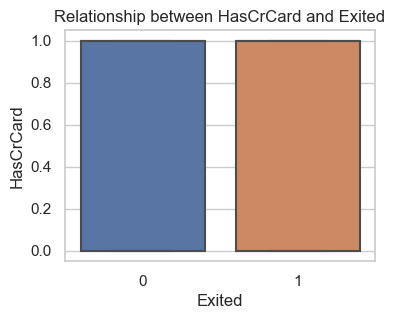

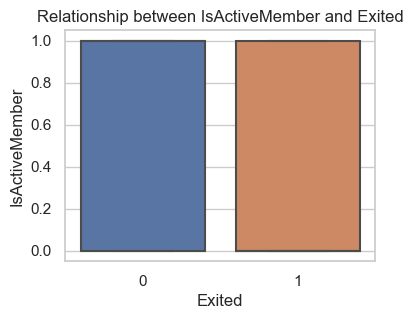

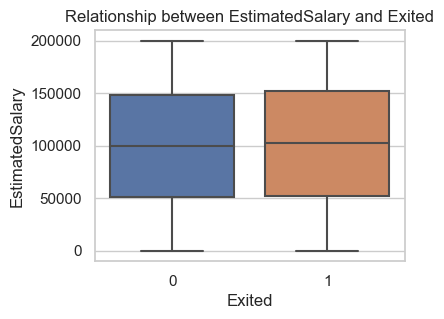

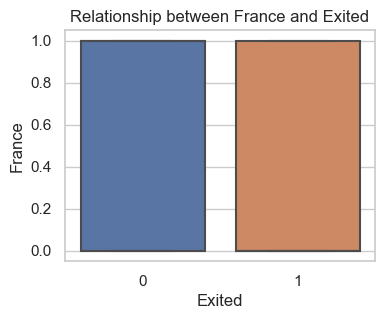

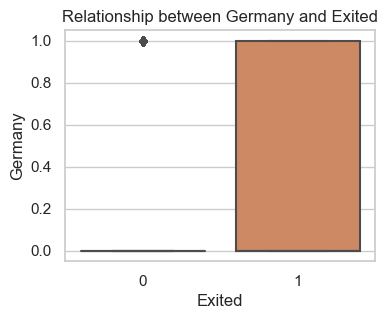

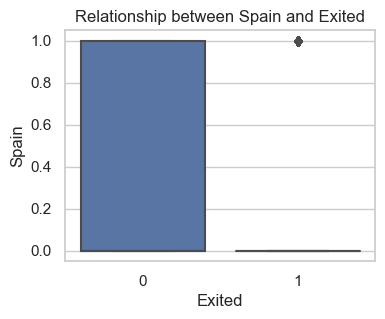

In [117]:
# to see the relationship between 'Exited' and Features
target_column = 'Exited'  

all_features = df.columns[df.columns != target_column]

for feature in all_features:
    if df[feature].dtype == 'object':
    
        plt.figure(figsize=(4, 3))
        sns.countplot(data=df, x=feature, hue=target_column)
        plt.title(f'Relationship between {feature} and {target_column}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45) 
        plt.show()
    else:
        
        plt.figure(figsize=(4, 3))
        sns.boxplot(data=df, x=target_column, y=feature)
        plt.title(f'Relationship between {feature} and {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(feature)
        plt.show()


# Preprocessing of Data
- Train | Test Split, Scalling

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [119]:
df.shape

(10000, 12)

In [120]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [121]:
X.shape

(10000, 11)

In [122]:
y.shape

(10000,)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state = 3)

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state = 3)

In [125]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")
print(f"X_val Shape: {X_val.shape}")
print(f"y_val Shape: {y_val.shape}")

X_train Shape: (8100, 11)
X_test Shape: (1000, 11)
y_train Shape: (8100,)
y_test Shape: (1000,)
X_val Shape: (900, 11)
y_val Shape: (900,)


In [126]:
#scaling
Scaler = MinMaxScaler()

In [127]:
X_train = Scaler.fit_transform(X_train)
X_val = Scaler.transform(X_val)

In [128]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_val Shape: {X_val.shape}")

X_train Shape: (8100, 11)
X_val Shape: (900, 11)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score, roc_curve,precision_recall_curve,average_precision_score,recall_score
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [130]:
model = Sequential()
model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001) # Defult value 
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])

In [131]:
model.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=64, epochs=350, verbose=1)

Epoch 1/350
127/127 [==============================] - 1s 3ms/step - loss: 0.5613 - accuracy: 0.7962 - val_loss: 0.5026 - val_accuracy: 0.7967
Epoch 2/350
127/127 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7963 - val_loss: 0.4798 - val_accuracy: 0.7967
Epoch 3/350
127/127 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7962 - val_loss: 0.4696 - val_accuracy: 0.7967
Epoch 4/350
127/127 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7984 - val_loss: 0.4619 - val_accuracy: 0.8044
Epoch 5/350
127/127 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8036 - val_loss: 0.4499 - val_accuracy: 0.8133
Epoch 6/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8093 - val_loss: 0.4439 - val_accuracy: 0.8089
Epoch 7/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8101 - val_loss: 0.4406 - val_accuracy: 0.8122

In [132]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                288       
                                                                 
 dense_10 (Dense)            (None, 6)                 150       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 445 (1.74 KB)
Trainable params: 445 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.561     0.796     0.503         0.797
1 0.489     0.796     0.480         0.797
2 0.472     0.796     0.470         0.797
3 0.460     0.798     0.462         0.804
4 0.451     0.804     0.450         0.813

<Axes: >

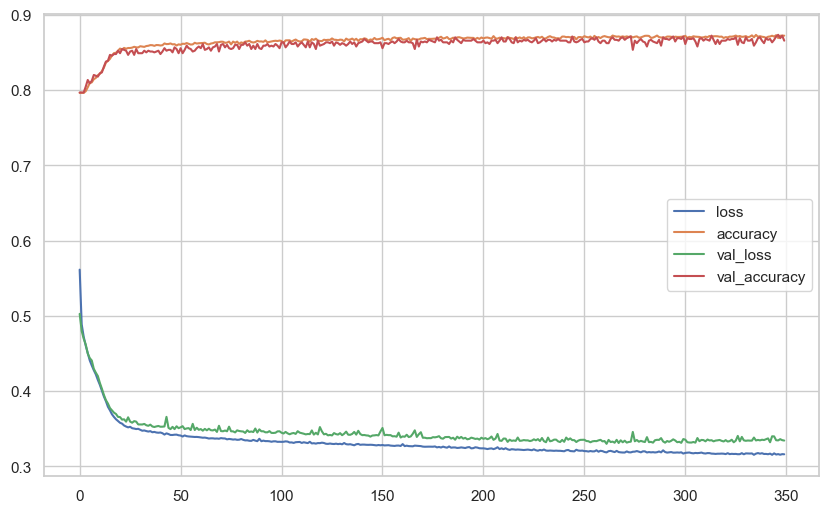

In [134]:
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [135]:
model.evaluate(X_test, y_test, verbose=0)

[208871.265625, 0.20399999618530273]

In [136]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)

In [137]:
print("test_loss", loss)
print("test_recall", recall)

test_loss 208871.265625
test_recall 0.20399999618530273


In [138]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[  0 796]
 [  0 204]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.10      0.50      0.17      1000
weighted avg       0.04      0.20      0.07      1000



32/32 [==============================] - 0s 2ms/step


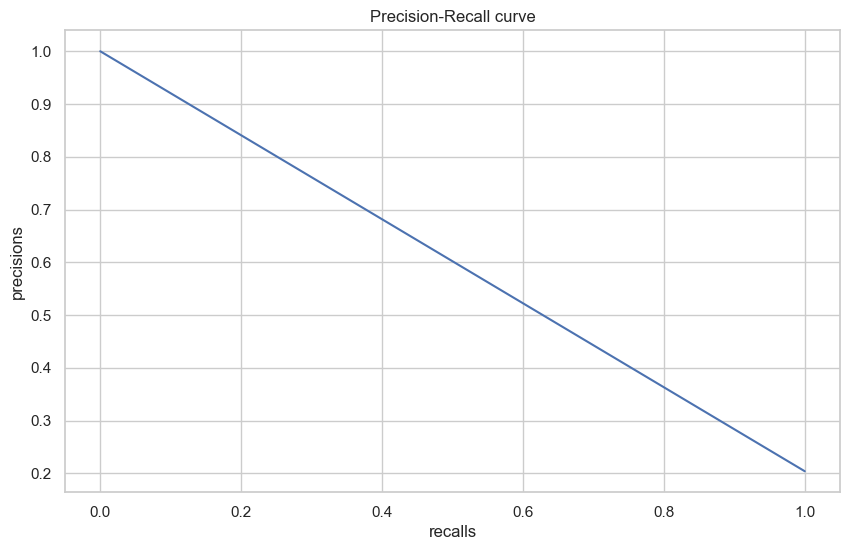

In [139]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [140]:
from sklearn.utils import class_weight

In [141]:
model01 = Sequential()
model01.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model01.add(Dense(6, activation = "relu"))
model01.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model01.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [142]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [143]:
class_weights = {0: class_weights[0], 1:class_weights[1]}
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [144]:
model01.fit(x=X_train, y=y_train,validation_data=(X_val,y_val), class_weight=class_weights, batch_size=64,verbose=1,epochs=350)

Epoch 1/350
127/127 [==============================] - 1s 4ms/step - loss: 0.6754 - recall: 0.8745 - val_loss: 0.7108 - val_recall: 0.8033
Epoch 2/350
127/127 [==============================] - 0s 3ms/step - loss: 0.6436 - recall: 0.7212 - val_loss: 0.6080 - val_recall: 0.5464
Epoch 3/350
127/127 [==============================] - 0s 3ms/step - loss: 0.6210 - recall: 0.6570 - val_loss: 0.6155 - val_recall: 0.6776
Epoch 4/350
127/127 [==============================] - 0s 3ms/step - loss: 0.6010 - recall: 0.6806 - val_loss: 0.6224 - val_recall: 0.6995
Epoch 5/350
127/127 [==============================] - 0s 3ms/step - loss: 0.5869 - recall: 0.6758 - val_loss: 0.6043 - val_recall: 0.6940
Epoch 6/350
127/127 [==============================] - 0s 3ms/step - loss: 0.5790 - recall: 0.6879 - val_loss: 0.6293 - val_recall: 0.7486
Epoch 7/350
127/127 [==============================] - 0s 3ms/step - loss: 0.5673 - recall: 0.7061 - val_loss: 0.5731 - val_recall: 0.6885
Epoch 8/350
127/127 [======

In [155]:
model01.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                288       
                                                                 
 dense_13 (Dense)            (None, 6)                 150       
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 445 (1.74 KB)
Trainable params: 445 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [177]:
loss_df = pd.DataFrame(model01.history.history)
loss_df.head()

Empty DataFrame
Columns: []
Index: []

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [148]:
model01.evaluate(X_test, y_test, verbose=0)

[388423.625, 1.0]

In [149]:
loss, recall = model01.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  388423.625
Test_Recall :  1.0


In [150]:
y_pred = model01.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[  0 796]
 [  0 204]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.10      0.50      0.17      1000
weighted avg       0.04      0.20      0.07      1000



32/32 [==============================] - 0s 2ms/step


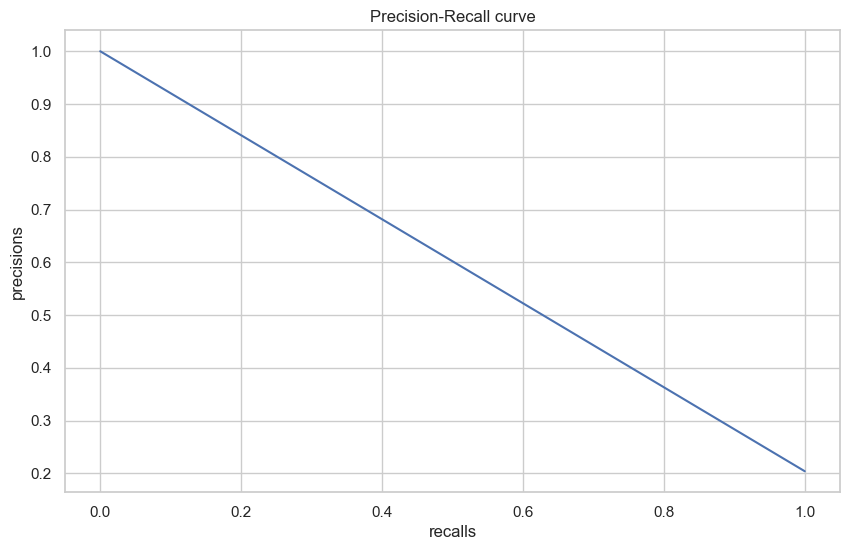

In [151]:
y_pred_proba = model01.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [152]:
average_precision_score(y_test,y_pred_proba)

0.204

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [153]:
model02 = Sequential()
model02.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model02.add(Dense(6, activation = "relu"))
model02.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.01)
model02.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["recall"])

In [154]:
model02.fit(x=X_train, y=y_train,validation_split=0.1, class_weight=class_weights, batch_size=64,verbose=1,epochs=350)

Epoch 1/350
114/114 [==============================] - 1s 4ms/step - loss: 0.6416 - accuracy: 0.6136 - val_loss: 0.5470 - val_accuracy: 0.7358
Epoch 2/350
114/114 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.7010 - val_loss: 0.6134 - val_accuracy: 0.6901
Epoch 3/350
114/114 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7348 - val_loss: 0.5127 - val_accuracy: 0.7864
Epoch 4/350
114/114 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.7509 - val_loss: 0.3940 - val_accuracy: 0.8383
Epoch 5/350
114/114 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.7626 - val_loss: 0.4680 - val_accuracy: 0.7790
Epoch 6/350
114/114 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7605 - val_loss: 0.5790 - val_accuracy: 0.7099
Epoch 7/350
114/114 [==============================] - 1s 5ms/step - loss: 0.4990 - accuracy: 0.7617 - val_loss: 0.4546 - val_accuracy: 0.7938

In [158]:
model01.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                288       
                                                                 
 dense_13 (Dense)            (None, 6)                 150       
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 445 (1.74 KB)
Trainable params: 445 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
loss_df = pd.DataFrame(model02.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.642     0.614     0.547         0.736
1 0.590     0.701     0.613         0.690
2 0.553     0.735     0.513         0.786
3 0.527     0.751     0.394         0.838
4 0.511     0.763     0.468         0.779

<Axes: >

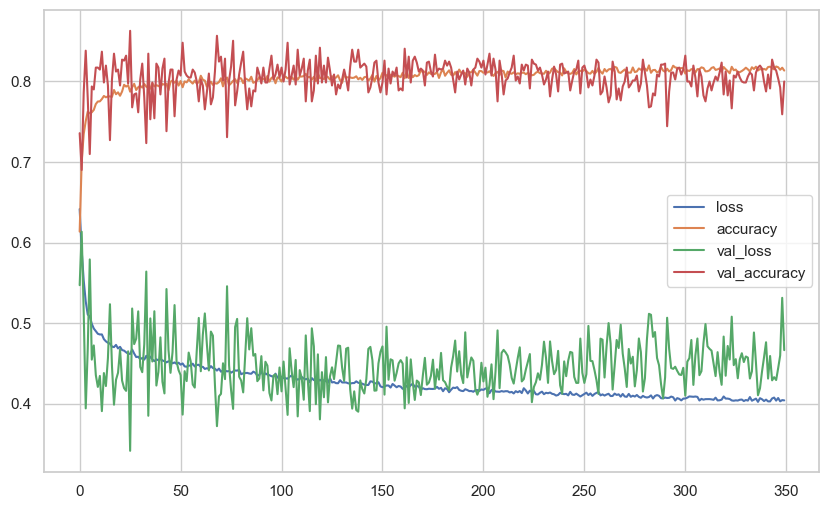

In [160]:
loss_df.plot()

In [166]:
loss, recall = model02.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  442400.5625
Test_Recall :  0.7289999723434448


32/32 [==============================] - 0s 2ms/step


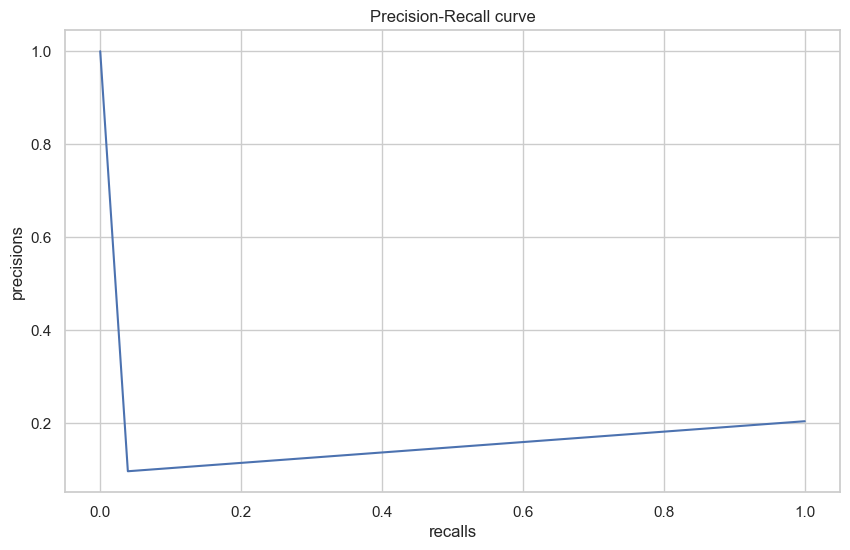

In [167]:
y_pred_proba = model02.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

### Add Dropout Layer

In [168]:
from tensorflow.keras.layers import Dropout
model03 = Sequential()
model03.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model03.add(Dropout(0.25))
model03.add(Dense(6, activation="relu"))
model03.add(Dropout(0.25))
model03.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model03.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [170]:
model03.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 350, verbose=1)

Epoch 1/350
127/127 [==============================] - 1s 4ms/step - loss: 0.5458 - recall: 0.0364 - val_loss: 0.4938 - val_recall: 0.0000e+00
Epoch 2/350
127/127 [==============================] - 0s 3ms/step - loss: 0.5084 - recall: 0.0030 - val_loss: 0.4757 - val_recall: 0.0000e+00
Epoch 3/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4909 - recall: 0.0018 - val_loss: 0.4719 - val_recall: 0.0000e+00
Epoch 4/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4871 - recall: 0.0000e+00 - val_loss: 0.4675 - val_recall: 0.0000e+00
Epoch 5/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4801 - recall: 0.0000e+00 - val_loss: 0.4639 - val_recall: 0.0000e+00
Epoch 6/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4737 - recall: 6.0606e-04 - val_loss: 0.4555 - val_recall: 0.0000e+00
Epoch 7/350
127/127 [==============================] - 0s 3ms/step - loss: 0.4685 - recall: 0.0133 - val_loss: 0.4488 - val_recall

In [171]:
model03.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 24)                288       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_19 (Dense)            (None, 6)                 150       
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 445 (1.74 KB)
Trainable params: 445 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
loss_df = pd.DataFrame(model03.history.history)
loss_df

loss  recall  val_loss  val_recall
0   0.546   0.036     0.494       0.000
1   0.508   0.003     0.476       0.000
2   0.491   0.002     0.472       0.000
3   0.487   0.000     0.467       0.000
4   0.480   0.000     0.464       0.000
..    ...     ...       ...         ...
345 0.350   0.413     0.337       0.481
346 0.352   0.413     0.338       0.432
347 0.348   0.413     0.339       0.470
348 0.356   0.399     0.337       0.454
349 0.349   0.427     0.338       0.464

[350 rows x 4 columns]

<Axes: >

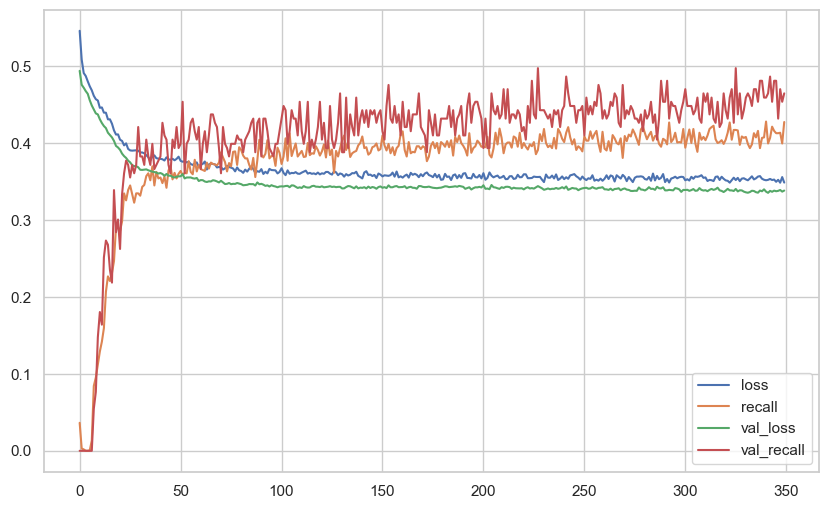

In [173]:
loss_df.plot()

In [174]:
loss, recall = model03.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  425250.8125
Test_Recall :  1.0


In [175]:
y_pred = model03.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[  2 794]
 [  0 204]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       796
           1       0.20      1.00      0.34       204

    accuracy                           0.21      1000
   macro avg       0.60      0.50      0.17      1000
weighted avg       0.84      0.21      0.07      1000



32/32 [==============================] - 0s 2ms/step


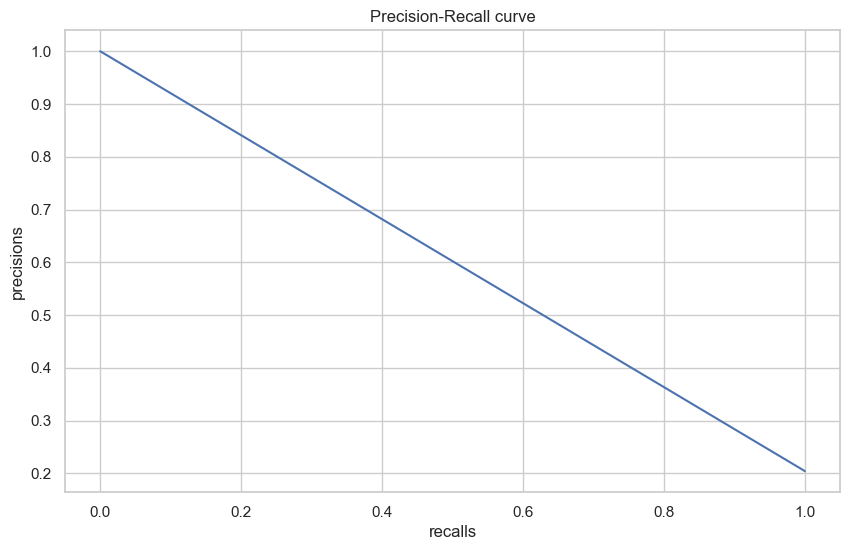

In [176]:
y_pred_proba = model03.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

### Add Early Stop

#### Monitor the "val_loss" as metric

In [180]:
from tensorflow.keras.callbacks import EarlyStopping
model04 = Sequential()
model04.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model04.add(Dense(6, activation = "relu"))
model04.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model04.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [181]:
early_stop = EarlyStopping(monitor="val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [182]:
model04.fit(x = X_train, y=y_train,validation_data = (X_val,y_val), batch_size = 64,verbose = 1,epochs = 700,  callbacks=[early_stop], class_weight=class_weights)


Epoch 1/700
127/127 [==============================] - 1s 4ms/step - loss: 0.6894 - recall: 0.0970 - val_loss: 0.6221 - val_recall: 0.3115
Epoch 2/700
127/127 [==============================] - 0s 3ms/step - loss: 0.6646 - recall: 0.3727 - val_loss: 0.6153 - val_recall: 0.5464
Epoch 3/700
127/127 [==============================] - 0s 3ms/step - loss: 0.6535 - recall: 0.5279 - val_loss: 0.6046 - val_recall: 0.6066
Epoch 4/700
127/127 [==============================] - 0s 3ms/step - loss: 0.6439 - recall: 0.6152 - val_loss: 0.6125 - val_recall: 0.6995
Epoch 5/700
127/127 [==============================] - 0s 3ms/step - loss: 0.6348 - recall: 0.6273 - val_loss: 0.5902 - val_recall: 0.6557
Epoch 6/700
127/127 [==============================] - 0s 3ms/step - loss: 0.6180 - recall: 0.6430 - val_loss: 0.6249 - val_recall: 0.7377
Epoch 7/700
127/127 [==============================] - 0s 3ms/step - loss: 0.5926 - recall: 0.6994 - val_loss: 0.5512 - val_recall: 0.6175
Epoch 8/700
127/127 [======

In [184]:
model04.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 24)                288       
                                                                 
 dense_22 (Dense)            (None, 6)                 150       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 445 (1.74 KB)
Trainable params: 445 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [185]:
loss_df = pd.DataFrame(model04.history.history)
loss_df

loss  recall  val_loss  val_recall
0  0.689   0.097     0.622       0.311
1  0.665   0.373     0.615       0.546
2  0.653   0.528     0.605       0.607
3  0.644   0.615     0.612       0.699
4  0.635   0.627     0.590       0.656
5  0.618   0.643     0.625       0.738
6  0.593   0.699     0.551       0.617
7  0.575   0.707     0.563       0.672
8  0.563   0.710     0.561       0.689
9  0.553   0.730     0.575       0.743
10 0.544   0.733     0.575       0.754
11 0.535   0.737     0.565       0.765
12 0.526   0.743     0.525       0.721
13 0.519   0.754     0.505       0.694
14 0.514   0.743     0.551       0.765
15 0.509   0.753     0.491       0.705
16 0.503   0.754     0.539       0.749
17 0.498   0.753     0.559       0.787
18 0.495   0.767     0.460       0.661
19 0.492   0.767     0.519       0.754
20 0.490   0.759     0.539       0.770
21 0.488   0.769     0.434       0.645
22 0.488   0.762     0.478       0.721
23 0.484   0.753     0.459       0.705
24 0.484   0.760     0.503       0.749
25 0.484   0.759     0.484       0.732
26 0.481   0.759     0.514       0.760
27 0.480   0.763     0.474       0.732
28 0.478   0.764     0.482       0.738
29 0.478   0.757     0.477       0.732
30 0.476   0.772     0.485       0.738
31 0.476   0.759     0.571       0.803
32 0.476   0.762     0.498       0.754
33 0.474   0.767     0.485       0.754
34 0.473   0.769     0.456       0.721
35 0.473   0.764     0.445       0.694
36 0.474   0.762     0.475       0.727
37 0.473   0.761     0.483       0.743
38 0.473   0.765     0.440       0.683
39 0.472   0.768     0.491       0.749
40 0.471   0.770     0.449       0.699
41 0.474   0.759     0.464       0.727

<Axes: >

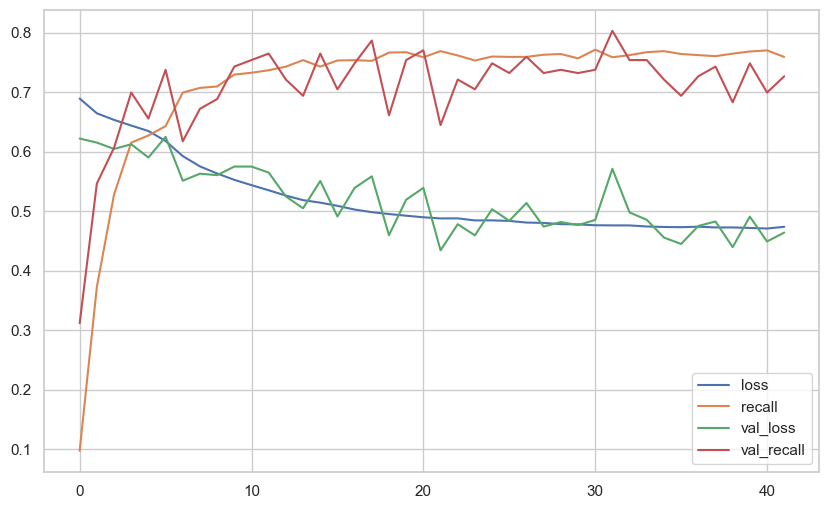

In [186]:
loss_df.plot()

In [187]:
y_pred = model04.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[  0 796]
 [  0 204]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.10      0.50      0.17      1000
weighted avg       0.04      0.20      0.07      1000



32/32 [==============================] - 0s 2ms/step


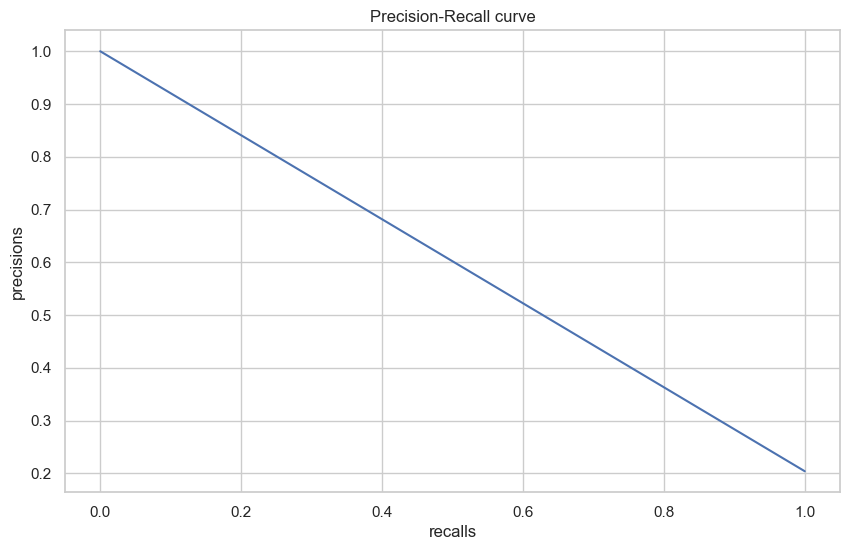

In [188]:
y_pred_proba = model04.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

#### Monitor the "val_recall" as metric

In [189]:
model05 = Sequential()
model05.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model05.add(Dense(6, activation = "relu"))
model05.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model05.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [190]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max",verbose=1, patience=15, restore_best_weights = True)

In [191]:
model05.fit(x=X_train, y=y_train,validation_data=(X_val,y_val), batch_size=64,verbose=1,epochs=700,  callbacks=[early_stop], class_weight=class_weights)

Epoch 1/700
127/127 [==============================] - 1s 6ms/step - loss: 0.6853 - recall: 0.6806 - val_loss: 0.6956 - val_recall: 0.7923
Epoch 2/700
127/127 [==============================] - 0s 4ms/step - loss: 0.6561 - recall: 0.7321 - val_loss: 0.6747 - val_recall: 0.7377
Epoch 3/700
127/127 [==============================] - 0s 3ms/step - loss: 0.6357 - recall: 0.6891 - val_loss: 0.6411 - val_recall: 0.6776
Epoch 4/700
127/127 [==============================] - 1s 6ms/step - loss: 0.6236 - recall: 0.6539 - val_loss: 0.6527 - val_recall: 0.7049
Epoch 5/700
127/127 [==============================] - 1s 8ms/step - loss: 0.6132 - recall: 0.6503 - val_loss: 0.6390 - val_recall: 0.7104
Epoch 6/700
127/127 [==============================] - 1s 6ms/step - loss: 0.6036 - recall: 0.6582 - val_loss: 0.6358 - val_recall: 0.6940
Epoch 7/700
127/127 [==============================] - 2s 18ms/step - loss: 0.5944 - recall: 0.6709 - val_loss: 0.6249 - val_recall: 0.6995
Epoch 8/700
127/127 [=====

In [192]:
model05.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                144       
                                                                 
 dense_25 (Dense)            (None, 6)                 78        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
loss_df = pd.DataFrame(model05.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.685   0.681     0.696       0.792
1 0.656   0.732     0.675       0.738
2 0.636   0.689     0.641       0.678
3 0.624   0.654     0.653       0.705
4 0.613   0.650     0.639       0.710

<Axes: >

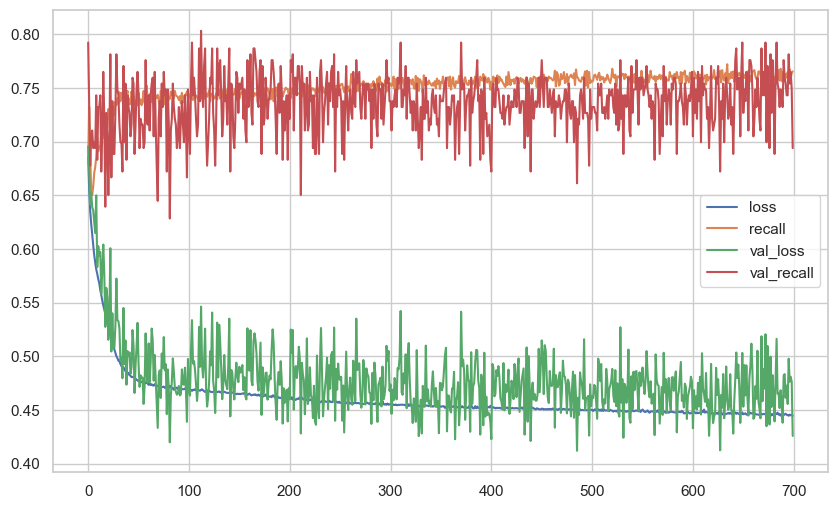

In [194]:
loss_df.plot()

In [210]:
y_pred = model05.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[  2 794]
 [  2 202]]
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       796
           1       0.20      0.99      0.34       204

    accuracy                           0.20      1000
   macro avg       0.35      0.50      0.17      1000
weighted avg       0.44      0.20      0.07      1000



## Optuna

In [197]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 7.0 MB/s eta 0:00:00


In [198]:
import optuna
from tensorflow.keras.optimizers.legacy import Adam, Adadelta, RMSprop, Nadam

In [202]:
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001,0.005)

    tf.random.set_seed(13)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=['accuracy'],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val,y_val),
        batch_size=64,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [203]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 22:19:02,152] A new study created in memory with name: no-name-32775769-fc39-4626-b5c3-e35fb83544da


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:19:12,510] Trial 0 finished with value: 0.20499999821186066 and parameters: {'n_units1': 86, 'n_units2': 43, 'optimizer': <class 'keras.src.optimizers.legacy.nadam.Nadam'>, 'learning_rate': 0.003046096017279181, 'w0': 0.019603367496032715, 'w1': 0.1812720237750883}. Best is trial 0 with value: 0.20499999821186066.


Restoring model weights from the end of the best epoch: 41.
Epoch 56: early stopping


[I 2023-10-30 22:19:37,811] Trial 1 finished with value: 0.20399999618530273 and parameters: {'n_units1': 120, 'n_units2': 89, 'optimizer': <class 'keras.src.optimizers.legacy.nadam.Nadam'>, 'learning_rate': 0.0012773532916103257, 'w0': 0.12328697373841142, 'w1': 0.021922015230452264}. Best is trial 0 with value: 0.20499999821186066.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 22:19:52,059] Trial 2 finished with value: 0.20399999618530273 and parameters: {'n_units1': 111, 'n_units2': 35, 'optimizer': <class 'keras.src.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.003454404453109976, 'w0': 0.2872199927057204, 'w1': 0.11072311591883545}. Best is trial 0 with value: 0.20499999821186066.
[I 2023-10-30 22:20:32,559] Trial 3 finished with value: 0.7960000038146973 and parameters: {'n_units1': 20, 'n_units2': 19, 'optimizer': <class 'keras.src.optimizers.legacy.adadelta.Adadelta'>, 'learning_rate': 0.0015871949021809772, 'w0': 0.01604194987762344, 'w1': 0.03262753756856629}. Best is trial 3 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 31.
Epoch 46: early stopping


[I 2023-10-30 22:20:49,580] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 22, 'n_units2': 77, 'optimizer': <class 'keras.src.optimizers.legacy.adadelta.Adadelta'>, 'learning_rate': 0.001731530502641076, 'w0': 2.2983411331977917, 'w1': 4.130719794556864}. Best is trial 3 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 53.
Epoch 68: early stopping


[I 2023-10-30 22:21:15,182] Trial 5 finished with value: 0.20399999618530273 and parameters: {'n_units1': 66, 'n_units2': 95, 'optimizer': <class 'keras.src.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.0012903375720042405, 'w0': 4.4130816509383, 'w1': 1.0609904664062677}. Best is trial 3 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:21:25,681] Trial 6 finished with value: 0.7960000038146973 and parameters: {'n_units1': 99, 'n_units2': 42, 'optimizer': <class 'keras.src.optimizers.legacy.adadelta.Adadelta'>, 'learning_rate': 0.0019904484540313586, 'w0': 0.3083165563141075, 'w1': 0.02119816488914683}. Best is trial 3 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:21:36,565] Trial 7 finished with value: 0.48100000619888306 and parameters: {'n_units1': 103, 'n_units2': 44, 'optimizer': <class 'keras.src.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.0033185741420876133, 'w0': 0.106067390205636, 'w1': 0.7498373152257266}. Best is trial 3 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:21:47,845] Trial 8 finished with value: 0.4860000014305115 and parameters: {'n_units1': 67, 'n_units2': 48, 'optimizer': <class 'keras.src.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.003443674279895097, 'w0': 0.08182148631933271, 'w1': 3.401109211520457}. Best is trial 3 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2023-10-30 22:22:04,940] Trial 9 finished with value: 0.20499999821186066 and parameters: {'n_units1': 127, 'n_units2': 31, 'optimizer': <class 'keras.src.optimizers.legacy.nadam.Nadam'>, 'learning_rate': 0.0017153856155884555, 'w0': 0.01557361586507801, 'w1': 0.6018385718298592}. Best is trial 3 with value: 0.7960000038146973.


{'n_units1': 20,
 'n_units2': 19,
 'optimizer': keras.src.optimizers.legacy.adadelta.Adadelta,
 'learning_rate': 0.0015871949021809772,
 'w0': 0.01604194987762344,
 'w1': 0.03262753756856629}

In [204]:
study.best_params

{'n_units1': 20,
 'n_units2': 19,
 'optimizer': keras.src.optimizers.legacy.adadelta.Adadelta,
 'learning_rate': 0.0015871949021809772,
 'w0': 0.01604194987762344,
 'w1': 0.03262753756856629}

In [205]:
# recall
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
# Extract the best hyperparameters obtained from the Optuna study for model construction.
# These parameters include the number of units in the two hidden layers, the chosen optimizer, learning rate, and class weights.

tf.random.set_seed(12)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(unit2, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


In [206]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=64,epochs=700,callbacks=[early_stop],verbose=1)

Epoch 1/700
127/127 [==============================] - 1s 5ms/step - loss: 0.7762 - accuracy: 0.4419 - val_loss: 0.7390 - val_accuracy: 0.3267
Epoch 2/700
127/127 [==============================] - 0s 4ms/step - loss: 0.7759 - accuracy: 0.4467 - val_loss: 0.7363 - val_accuracy: 0.3278
Epoch 3/700
127/127 [==============================] - 0s 3ms/step - loss: 0.7705 - accuracy: 0.4479 - val_loss: 0.7334 - val_accuracy: 0.3333
Epoch 4/700
127/127 [==============================] - 0s 4ms/step - loss: 0.7652 - accuracy: 0.4591 - val_loss: 0.7306 - val_accuracy: 0.3500
Epoch 5/700
127/127 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.4472 - val_loss: 0.7277 - val_accuracy: 0.3567
Epoch 6/700
127/127 [==============================] - 0s 3ms/step - loss: 0.7614 - accuracy: 0.4611 - val_loss: 0.7248 - val_accuracy: 0.3644
Epoch 7/700
127/127 [==============================] - 0s 3ms/step - loss: 0.7569 - accuracy: 0.4647 - val_loss: 0.7218 - val_accuracy: 0.3778

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [207]:
model05.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                144       
                                                                 
 dense_25 (Dense)            (None, 6)                 78        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [208]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.776     0.442     0.739         0.327
1 0.776     0.447     0.736         0.328
2 0.770     0.448     0.733         0.333
3 0.765     0.459     0.731         0.350
4 0.767     0.447     0.728         0.357

<Axes: >

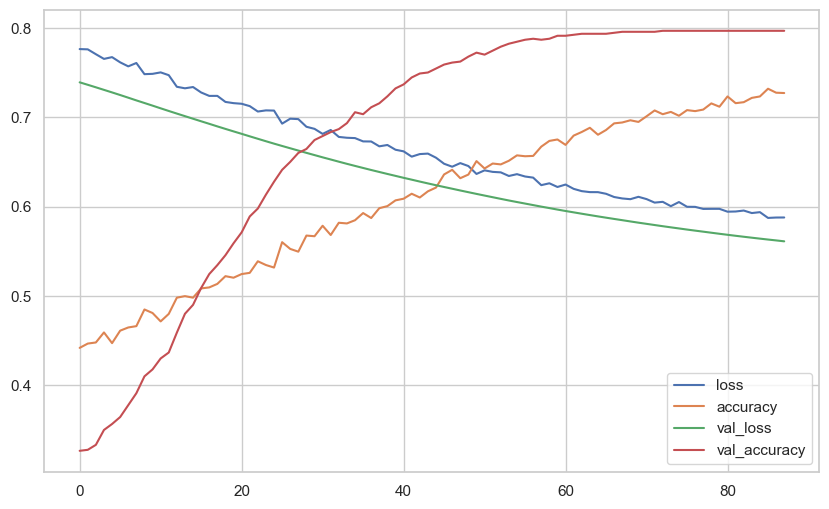

In [209]:
loss_df.plot()

In [211]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[516 280]
 [173  31]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       796
           1       0.10      0.15      0.12       204

    accuracy                           0.55      1000
   macro avg       0.42      0.40      0.41      1000
weighted avg       0.62      0.55      0.58      1000



32/32 [==============================] - 0s 2ms/step


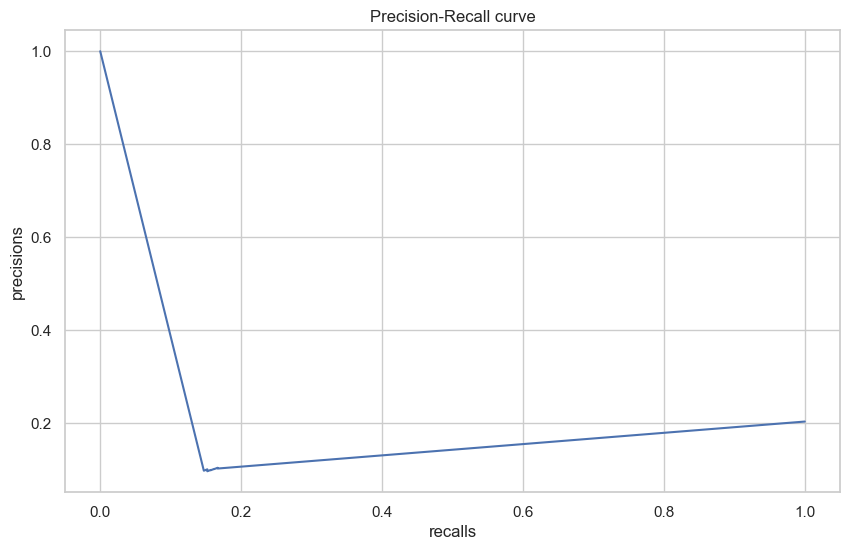

In [212]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

# Final Model and Model Deployment

In [214]:
model = Sequential()
model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [215]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [216]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 350, verbose = 1,
          callbacks = [early_stop], class_weight= class_weights)

Epoch 1/350
127/127 [==============================] - 1s 6ms/step - loss: 0.6528 - recall: 0.5515 - val_loss: 29081.1562 - val_recall: 1.0000
Epoch 2/350
127/127 [==============================] - 0s 3ms/step - loss: 0.5689 - recall: 0.7085 - val_loss: 51662.5195 - val_recall: 1.0000
Epoch 3/350
127/127 [==============================] - 0s 3ms/step - loss: 0.5138 - recall: 0.7552 - val_loss: 60049.2734 - val_recall: 0.8186
Epoch 4/350
127/127 [==============================] - 1s 5ms/step - loss: 0.4968 - recall: 0.7455 - val_loss: 103206.6641 - val_recall: 1.0000
Epoch 5/350
127/127 [==============================] - 1s 4ms/step - loss: 0.4890 - recall: 0.7545 - val_loss: 102628.7109 - val_recall: 0.8186
Epoch 6/350
127/127 [==============================] - 1s 5ms/step - loss: 0.4868 - recall: 0.7564 - val_loss: 113963.1484 - val_recall: 0.8186
Epoch 7/350
127/127 [==============================] - 1s 5ms/step - loss: 0.4821 - recall: 0.7491 - val_loss: 104006.9766 - val_recall: 0.

In [217]:
model05.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                144       
                                                                 
 dense_25 (Dense)            (None, 6)                 78        
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

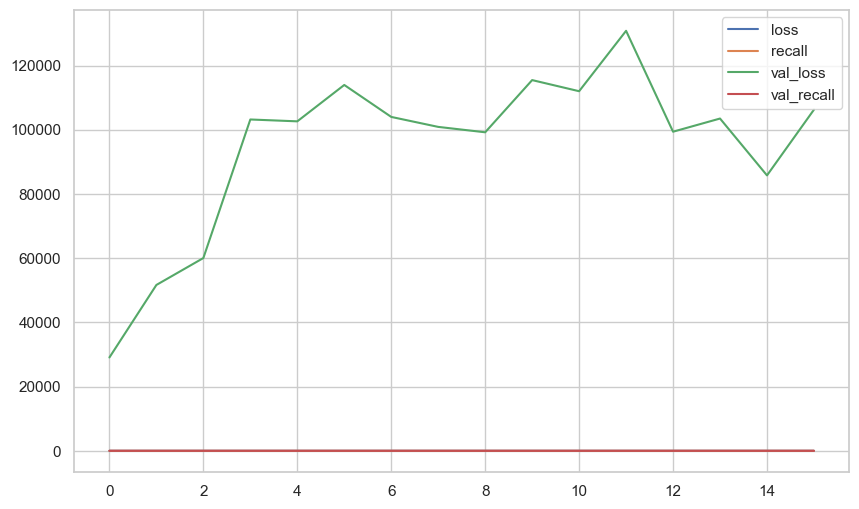

In [218]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [219]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[  1 795]
 [  0 204]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.60      0.50      0.17      1000
weighted avg       0.84      0.20      0.07      1000



## Prediction

In [221]:
from sklearn.preprocessing import StandardScaler
import pickle

# Create and initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data (X) before saving it
scaler.fit(X)

# Save the scaler to a file
with open("scaler_churn.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [223]:

pickle.dump(scaler, open("scaler_churn", 'wb'))
model.save('model_churn.h5')

In [224]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [225]:
churn = df.drop('Exited', axis = 1).iloc[224:225, :]
churn

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
224          671   45       6 99564.220              1          1   

     IsActiveMember  EstimatedSalary  France  Germany  Spain  
224               1       108872.450       0        1      0

In [226]:
churn = scaler_churn.transform(churn) 
churn

array([[ 0.21181091,  0.5795782 ,  0.34135195,  0.36987892, -0.91158349,
         0.64609167,  0.97024255,  0.15271386, -1.00280393,  1.72790383,
        -0.57380915]])

In [227]:
(model_churn.predict(churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 74ms/step


array([[1]], dtype=int32)

In [228]:
df["Exited"].iloc[0] & df.iloc[224:225, :]['Exited']

224    1
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___